In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
print(os.listdir("/content/drive/My Drive/"))


['Getting started.pdf', 'Half Yearly Exam.gform', "ayush cv v' (1).docx", "ayush cv v'.docx", 'Ancient Indian History by Romila Thapar.gdoc', 'AYUSH NAGPAL (W).pdf', 'Nagpal,Ayush-Authorization.pdf', 'Nagpal,Ayush T1 2023 for sign (1).pdf', 'Nagpal,Ayush T1 2023 for sign.pdf', 'AyushSecurity(c).pdf', 'Colab Notebooks', 'archive.zip', 'archive (1).zip', 'Python Assignment', 'Advertising_Budget_and_Sales[1].csv', 'Housing[1].csv', 'Copy of Housing[1] (1).csv', 'Copy of Housing[1].csv', 'GG.csv', 'titanic.csv', 'assignment7', 'Tvl1.csv', 'flight.xlsx', 'googleplaystore.csv', 'wine.csv', 'studentperformance.csv']


In [4]:
import pandas as pd

file_path = "/content/drive/My Drive/studentperformance.csv"
df = pd.read_csv(file_path)


print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      s

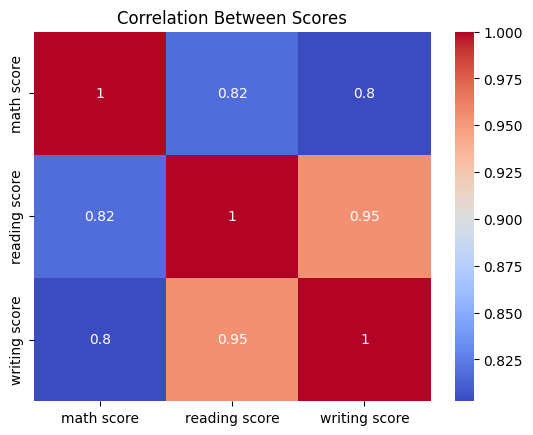

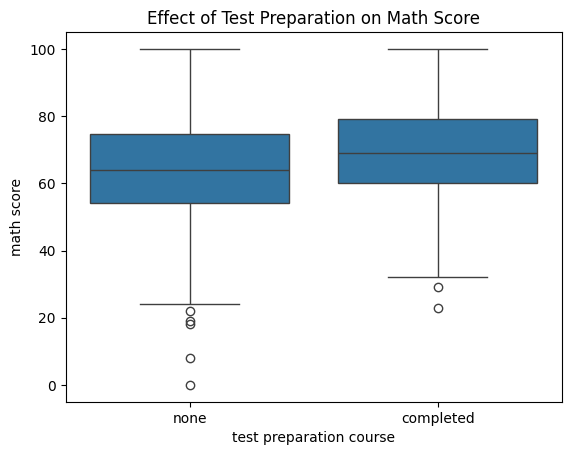

T-test for Test Prep Effect on Math Score: t-stat=5.704616417349102, p-value=1.5359134607147415e-08


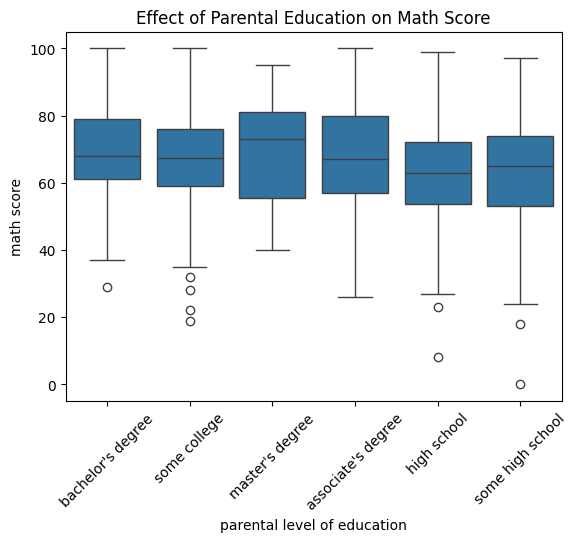

ANOVA Test for Parental Education Effect: F-stat=6.521582600453217, p-value=5.592272384107223e-06


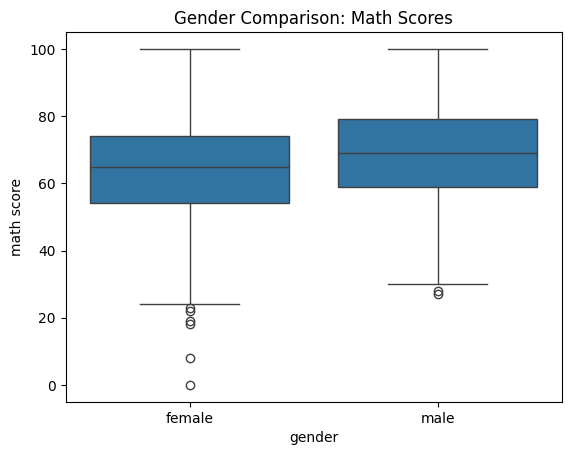

T-test for Gender Effect on Math Score: t-stat=5.383245869828983, p-value=9.120185549328822e-08


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

print(df.info())
print(df.head())

correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Scores")
plt.show()

sns.boxplot(x="test preparation course", y="math score", data=df)
plt.title("Effect of Test Preparation on Math Score")
plt.show()

prep_yes = df[df["test preparation course"] == "completed"]["math score"]
prep_no = df[df["test preparation course"] == "none"]["math score"]

t_stat, p_value = ttest_ind(prep_yes, prep_no)
print(f"T-test for Test Prep Effect on Math Score: t-stat={t_stat}, p-value={p_value}")

sns.boxplot(x="parental level of education", y="math score", data=df)
plt.xticks(rotation=45)
plt.title("Effect of Parental Education on Math Score")
plt.show()

groups = [df[df["parental level of education"] == level]["math score"] for level in df["parental level of education"].unique()]
anova_stat, anova_p = f_oneway(*groups)
print(f"ANOVA Test for Parental Education Effect: F-stat={anova_stat}, p-value={anova_p}")

sns.boxplot(x="gender", y="math score", data=df)
plt.title("Gender Comparison: Math Scores")
plt.show()

male_scores = df[df["gender"] == "male"]["math score"]
female_scores = df[df["gender"] == "female"]["math score"]

t_stat_gender, p_value_gender = ttest_ind(male_scores, female_scores)
print(f"T-test for Gender Effect on Math Score: t-stat={t_stat_gender}, p-value={p_value_gender}")



In [9]:
df = pd.get_dummies(df, columns=['race/ethnicity', 'lunch', 'test preparation course'], drop_first=True)


In [10]:
education_order = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}
df["parental level of education"] = df["parental level of education"].map(education_order)


In [11]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average score"] = df["total score"] / 3


In [12]:
df["performance_category"] = pd.cut(df["average score"], bins=[0, 50, 75, 100], labels=["Low", "Medium", "High"])


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['math score', 'reading score', 'writing score', 'total score', 'average score']] = scaler.fit_transform(
    df[['math score', 'reading score', 'writing score', 'total score', 'average score']]
)


In [14]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'performance_category'])
y = df['performance_category']


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1    

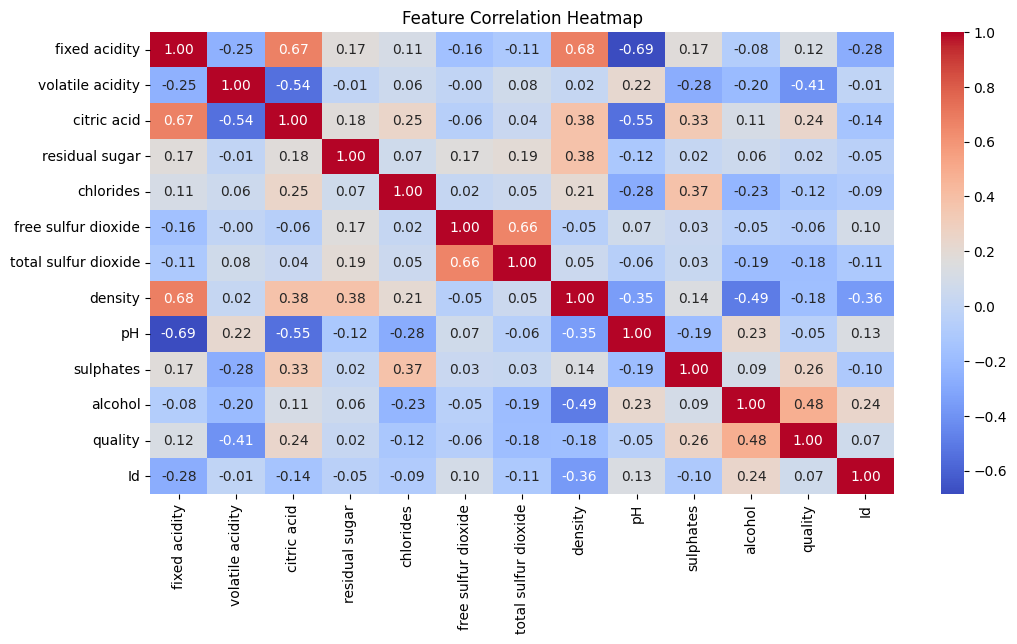


Feature Correlations with Wine Quality:
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


<ipython-input-16-f42af22d030c>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


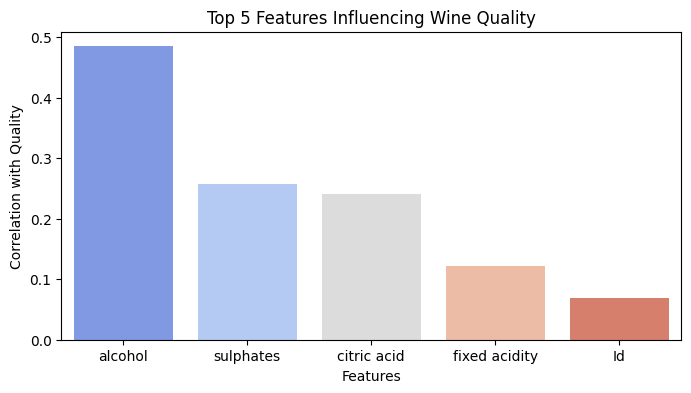

<ipython-input-16-f42af22d030c>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=wine_data['quality'], y=wine_data[feature], palette='coolwarm')
<ipython-input-16-f42af22d030c>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=wine_data['quality'], y=wine_data[feature], palette='coolwarm')
<ipython-input-16-f42af22d030c>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=wine_data['quality'], y=wine_data[feature], palette='coolwarm')
<ipython-input-16-f42af22d030c>:51: FutureWarning: 

Passing `palette` without assigning `hue` is depre

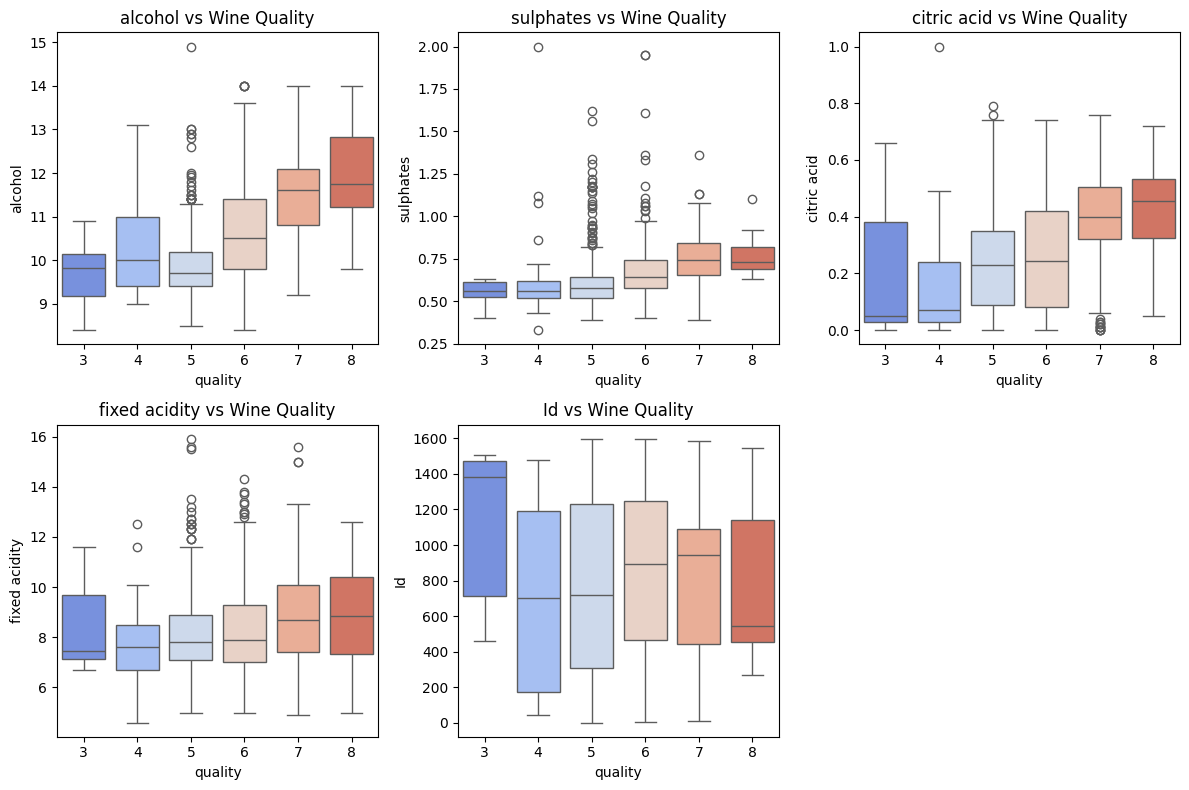

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "/content/drive/My Drive/wine.csv"
wine_data = pd.read_csv(file_path)


print("First 5 rows of the dataset:")
print(wine_data.head())


print("\nDataset Columns:")
print(wine_data.columns)


print("\nMissing Values in Dataset:")
print(wine_data.isnull().sum())


print("\nSummary Statistics:")
print(wine_data.describe())


plt.figure(figsize=(12, 6))
sns.heatmap(wine_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


correlation = wine_data.corr()['quality'].sort_values(ascending=False)
print("\nFeature Correlations with Wine Quality:")
print(correlation)


top_features = correlation[1:6]
plt.figure(figsize=(8, 4))
sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")
plt.title("Top 5 Features Influencing Wine Quality")
plt.xlabel("Features")
plt.ylabel("Correlation with Quality")
plt.show()


features = top_features.index.tolist()
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=wine_data['quality'], y=wine_data[feature], palette='coolwarm')
    plt.title(f"{feature} vs Wine Quality")

plt.tight_layout()
plt.show()

In [17]:
print("Missing Values in Each Column:")
print(wine_data.isnull().sum())


Missing Values in Each Column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [18]:
wine_data_cleaned = wine_data.dropna()


In [19]:
wine_data.fillna(wine_data.mean(), inplace=True)


In [20]:
wine_data.fillna(wine_data.mode().iloc[0], inplace=True)


In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
wine_data_imputed = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)


<Figure size 1500x1000 with 0 Axes>

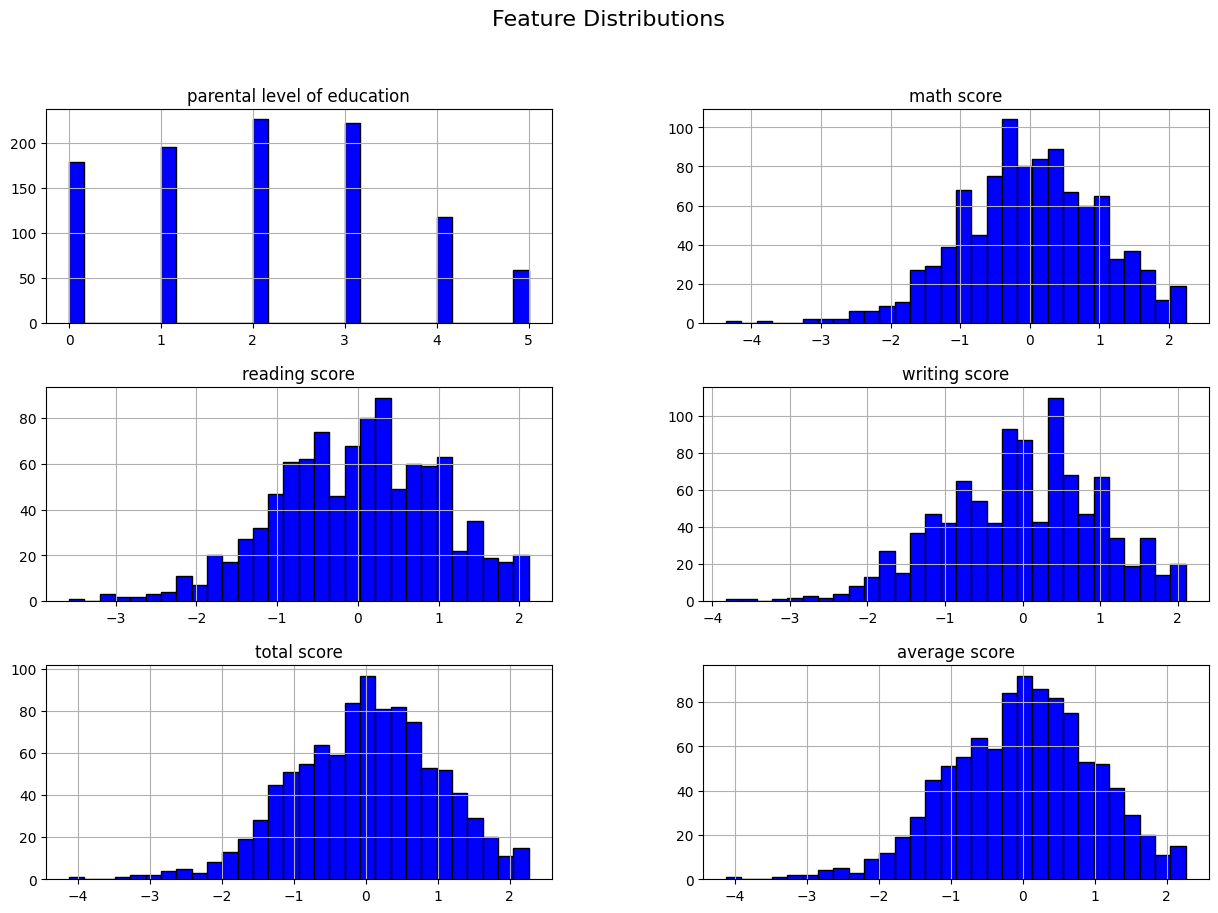

Feature 'parental level of education' is not normally distributed (p-value = 0.00000)
Feature 'math score' is not normally distributed (p-value = 0.00015)
Feature 'reading score' is not normally distributed (p-value = 0.00011)
Feature 'writing score' is not normally distributed (p-value = 0.00003)
Feature 'total score' is not normally distributed (p-value = 0.00015)
Feature 'average score' is not normally distributed (p-value = 0.00015)

Non-Normal Features: ['parental level of education', 'math score', 'reading score', 'writing score', 'total score', 'average score']


In [27]:
from scipy.stats import shapiro
plt.figure(figsize=(15, 10))
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

non_normal_features = []
alpha = 0.05

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    stat, p = shapiro(df[col].dropna())
    if p < alpha:
        non_normal_features.append(col)
        print(f"Feature '{col}' is not normally distributed (p-value = {p:.5f})")

print("\nNon-Normal Features:", non_normal_features)

<Figure size 1500x1000 with 0 Axes>

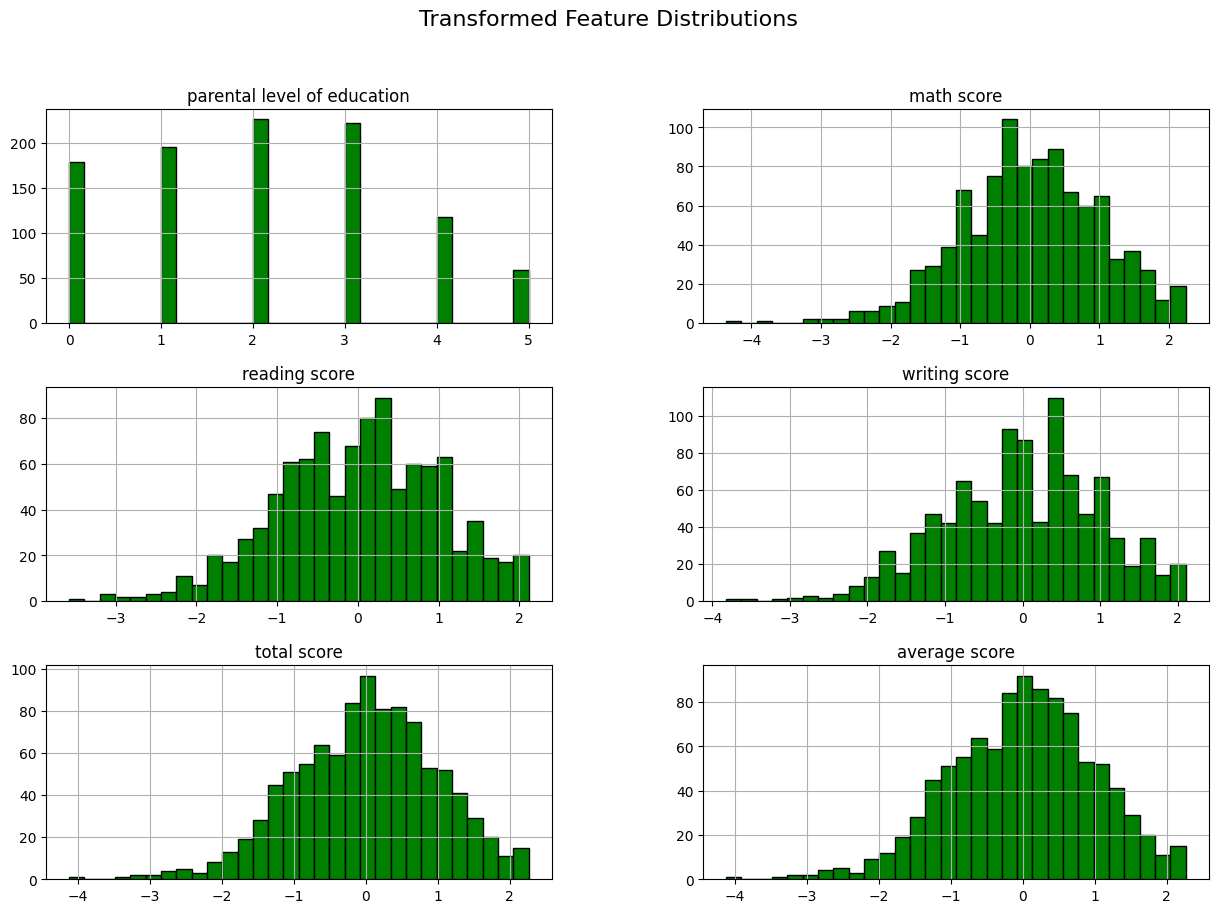

In [30]:
import os
df_transformed = df.copy()

for col in non_normal_features:
    if (df[col] > 0).all():
        df_transformed[col + "_log"] = np.log1p(df[col])
        df_transformed[col + "_sqrt"] = np.sqrt(df[col])
        df_transformed[col + "_boxcox"], _ = boxcox(df[col] + 1)

plt.figure(figsize=(15, 10))
df_transformed.hist(bins=30, figsize=(15, 10), color='green', edgecolor='black')
plt.suptitle("Transformed Feature Distributions", fontsize=16)
plt.show()
os.makedirs("/mnt/data", exist_ok=True)
df_transformed.to_csv("/mnt/data/wine_transformed.csv", index=False)